In [21]:
import math
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder 
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

df = pd.read_csv("diabetic_data.csv")

In [22]:
df.shape

(101766, 50)

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
encounter_id                101766 non-null int64
patient_nbr                 101766 non-null int64
race                        101766 non-null object
gender                      101766 non-null object
age                         101766 non-null object
weight                      101766 non-null object
admission_type_id           101766 non-null int64
discharge_disposition_id    101766 non-null int64
admission_source_id         101766 non-null int64
time_in_hospital            101766 non-null int64
payer_code                  101766 non-null object
medical_specialty           101766 non-null object
num_lab_procedures          101766 non-null int64
num_procedures              101766 non-null int64
num_medications             101766 non-null int64
number_outpatient           101766 non-null int64
number_emergency            101766 non-null int64
number_inpatient            10176

In [24]:
print(df.columns)

Index(['encounter_id', 'patient_nbr', 'race', 'gender', 'age', 'weight',
       'admission_type_id', 'discharge_disposition_id', 'admission_source_id',
       'time_in_hospital', 'payer_code', 'medical_specialty',
       'num_lab_procedures', 'num_procedures', 'num_medications',
       'number_outpatient', 'number_emergency', 'number_inpatient', 'diag_1',
       'diag_2', 'diag_3', 'number_diagnoses', 'max_glu_serum', 'A1Cresult',
       'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
       'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'examide', 'citoglipton', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted'],
      dtype='object')


In [25]:
# Select categorical columns irrespective of cardinality (convenient for label encoding)
categorical_cols = [cname for cname in df.columns if 
                    df[cname].dtype == "object"]

# Select numerical columns
numerical_cols = [cname for cname in df.columns if 
                df[cname].dtype in ['int64', 'float64']]

print(categorical_cols)
print(numerical_cols)

['race', 'gender', 'age', 'weight', 'payer_code', 'medical_specialty', 'diag_1', 'diag_2', 'diag_3', 'max_glu_serum', 'A1Cresult', 'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide', 'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone', 'tolazamide', 'examide', 'citoglipton', 'insulin', 'glyburide-metformin', 'glipizide-metformin', 'glimepiride-pioglitazone', 'metformin-rosiglitazone', 'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted']
['encounter_id', 'patient_nbr', 'admission_type_id', 'discharge_disposition_id', 'admission_source_id', 'time_in_hospital', 'num_lab_procedures', 'num_procedures', 'num_medications', 'number_outpatient', 'number_emergency', 'number_inpatient', 'number_diagnoses']


In [26]:
pd.set_option('display.float_format', '{:.2f}'.format) # Suppress scientific notations
pd.set_option("display.max_columns", 10) # Display all columns
print(df.describe())

       encounter_id  patient_nbr  admission_type_id  discharge_disposition_id  \
count     101766.00    101766.00          101766.00                 101766.00   
mean   165201645.62  54330400.69               2.02                      3.72   
std    102640295.98  38696359.35               1.45                      5.28   
min        12522.00       135.00               1.00                      1.00   
25%     84961194.00  23413221.00               1.00                      1.00   
50%    152388987.00  45505143.00               1.00                      1.00   
75%    230270887.50  87545949.75               3.00                      4.00   
max    443867222.00 189502619.00               8.00                     28.00   

       admission_source_id  ...  num_medications  number_outpatient  \
count            101766.00  ...        101766.00          101766.00   
mean                  5.75  ...            16.02               0.37   
std                   4.06  ...             8.13         

In [10]:
# Let's write a function to print the total percentage of the missing values.
#(this can be a good exercise for beginners to try to write simple functions like this.)
def missing_percentage(df):
    """This function takes a DataFrame(df) as input and returns two columns, total missing values and total missing values percentage"""
    total = df.isnull().sum().sort_values(ascending = False)
    percent = round(df.isnull().sum().sort_values(ascending = False)/len(df)*100,2)
    return pd.concat([total, percent], axis=1, keys=['Total','Percent'])

In [11]:
missing_percentage(df)

,Total,Percent
readmitted,0,0.00
num_lab_procedures,0,0.00
max_glu_serum,0,0.00
number_diagnoses,0,0.00
diag_3,0,0.00
diag_2,0,0.00
diag_1,0,0.00
number_inpatient,0,0.00
number_emergency,0,0.00
number_outpatient,0,0.00


In [30]:
import pandas as pd
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
df.head(5)

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,?,Pediatrics-Endocrinology,41,0,1,0,0,0,250.83,?,?,1,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,?,?,59,0,18,0,0,0,276,250.01,255,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,?,?,11,5,13,2,0,1,648,250,V27,6,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,?,?,44,1,16,0,0,0,8,250.43,403,7,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,?,?,51,0,8,0,0,0,197,157,250,5,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [33]:
df1 = df.replace('?', np.NaN)

In [34]:
# Let's write a function to print the total percentage of the missing values.
#(this can be a good exercise for beginners to try to write simple functions like this.)
def missing_percentage(df):
    """This function takes a DataFrame(df) as input and returns two columns, total missing values and total missing values percentage"""
    total = df.isnull().sum().sort_values(ascending = False)
    percent = round(df.isnull().sum().sort_values(ascending = False)/len(df)*100,2)
    return pd.concat([total, percent], axis=1, keys=['Total','Percent'])

missing_percentage(df1)

,Total,Percent
weight,98569,96.86
medical_specialty,49949,49.08
payer_code,40256,39.56
race,2273,2.23
diag_3,1423,1.40
diag_2,358,0.35
diag_1,21,0.02
num_procedures,0,0.00
max_glu_serum,0,0.00
number_diagnoses,0,0.00


In [5]:
# df  = df.fillna(0)

In [15]:
print(df.groupby('readmitted').size())

readmitted
<30    11357
>30    35545
NO     54864
dtype: int64


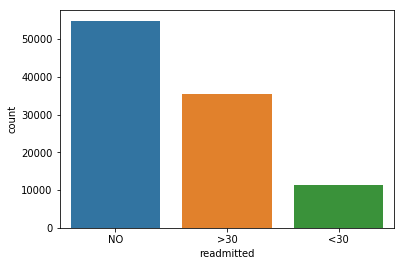

In [17]:
import seaborn as sns

sns.countplot(df['readmitted'], label="Count")

In [18]:
print(df.groupby('A1Cresult').size())

A1Cresult
>7       3812
>8       8216
None    84748
Norm     4990
dtype: int64


In [19]:
df = pd.get_dummies(df, columns=categorical_cols)
print(list(df.columns))

['encounter_id', 'patient_nbr', 'admission_type_id', 'discharge_disposition_id', 'admission_source_id', 'time_in_hospital', 'num_lab_procedures', 'num_procedures', 'num_medications', 'number_outpatient', 'number_emergency', 'number_inpatient', 'number_diagnoses', 'race_?', 'race_AfricanAmerican', 'race_Asian', 'race_Caucasian', 'race_Hispanic', 'race_Other', 'gender_Female', 'gender_Male', 'gender_Unknown/Invalid', 'age_[0-10)', 'age_[10-20)', 'age_[20-30)', 'age_[30-40)', 'age_[40-50)', 'age_[50-60)', 'age_[60-70)', 'age_[70-80)', 'age_[80-90)', 'age_[90-100)', 'weight_>200', 'weight_?', 'weight_[0-25)', 'weight_[100-125)', 'weight_[125-150)', 'weight_[150-175)', 'weight_[175-200)', 'weight_[25-50)', 'weight_[50-75)', 'weight_[75-100)', 'payer_code_?', 'payer_code_BC', 'payer_code_CH', 'payer_code_CM', 'payer_code_CP', 'payer_code_DM', 'payer_code_FR', 'payer_code_HM', 'payer_code_MC', 'payer_code_MD', 'payer_code_MP', 'payer_code_OG', 'payer_code_OT', 'payer_code_PO', 'payer_code_SI'

In [34]:
col = list(df.columns)
col.remove("Target")
col.remove("id")

In [35]:
X = df[col].values
Y = df[['Target']].values

In [119]:
train_x, test_x, train_y,test_y = train_test_split(X, Y, test_size=0.30,random_state=1000)

## Creating Decision Tree
dt = DecisionTreeClassifier(max_depth=8, criterion='gini', random_state=0)
dt.fit(train_x, train_y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=8,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=0, splitter='best')

In [120]:
# import graphviz
# from sklearn import tree
# dot_data = tree.export_graphviz(dt, out_file=None,feature_names=col,class_names=['0','1'], 
#                                 filled=True, rounded=True,special_characters=True)  

# graph = graphviz.Source(dot_data) 
# graph

In [121]:
#Save the graph as pdf
graph.render("Graph_dt")


'Graph_dt.pdf'

In [122]:
pred_class = dt.predict(test_x)
pred_prob  = dt.predict_proba(test_x)
print(pred_class[0:4])
print(pred_prob[0:4])

[0 0 0 0]
[[0.91176471 0.08823529]
 [0.77218935 0.22781065]
 [0.57064472 0.42935528]
 [0.64102564 0.35897436]]


In [123]:
#confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(test_y, pred_class)

array([[9539,  377],
       [2256,  397]])

In [124]:
tn=confusion_matrix(test_y, pred_class)[0,0]
tp=confusion_matrix(test_y, pred_class)[1,1]
fn=confusion_matrix(test_y, pred_class)[1,0]
fp=confusion_matrix(test_y, pred_class)[0,1]


In [125]:
print(tn, fp, fn, tp)

9539 377 2256 397


In [126]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

print(accuracy_score(test_y, pred_class))
print(precision_score(test_y, pred_class))
print(recall_score(test_y, pred_class))

0.7905163497493835
0.5129198966408268
0.14964191481341876


In [127]:
#RoC Value
from sklearn.metrics import roc_auc_score
roc_auc_score(test_y, pred_prob[0:,1:])

0.7512744444969861

In [128]:
#feature importance of decision tree
#sorted(zip(dt.feature_importances_,col),reverse=True)

In [129]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
feature_imp = pd.DataFrame(sorted(zip(dt.feature_importances_, col), reverse=True), columns=['Value','Feature'])


In [130]:
feature_imp

,Value,Feature
0,0.60,x9
1,0.14,x36
2,0.04,x37
3,0.02,x31
4,0.02,x32
5,0.02,x35
6,0.02,x10
7,0.02,x5
8,0.01,x33
9,0.01,x11


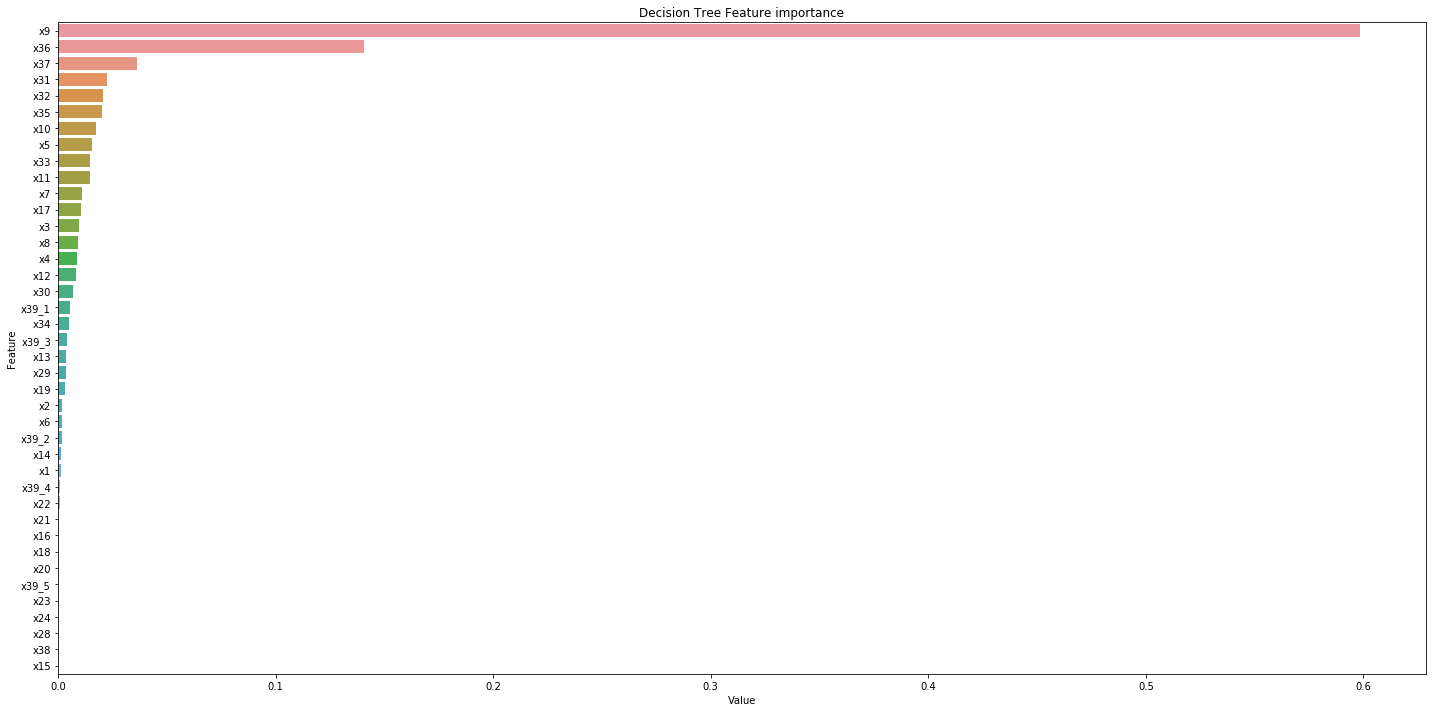

In [131]:
plt.figure(figsize=(20, 10))
sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value", ascending=False))
plt.title('Decision Tree Feature importance')
plt.tight_layout()
plt.show()

In [132]:
train_x, test_x, train_y,test_y = train_test_split(X,Y,test_size=0.30,random_state=1000)
out=[]
from sklearn.metrics import confusion_matrix,recall_score, precision_score
## Creating Decision Tree
for i in range(2,17):
    pt = DecisionTreeClassifier(max_depth=i,criterion='gini',random_state=0)
    pt.fit(train_x,train_y)
#  print("depth "+str(i))
    pred_class = pt.predict(test_x)
    pred_prob  = pt.predict_proba(test_x)
    con=confusion_matrix(test_y, pred_class)
    pr =precision_score(test_y, pred_class)
    recall =recall_score(test_y, pred_class)
    auc=roc_auc_score(test_y, pred_prob[0:,1:])
    out.append((i,con[0,0],con[0,1],con[1,0],con[1,1],pr,recall,auc))
    #print(confusion_matrix(test_y, pred_class))
    #print(roc_auc_score(test_y, pred_prob[0:,1:]))
pd.DataFrame(out,columns=["depth","tn","tp","fn","fp","pr","rec","auc"])


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


,depth,tn,tp,fn,fp,pr,rec,auc
0,2,9916,0,2653,0,0.00,0.00,0.73
1,3,9916,0,2653,0,0.00,0.00,0.74
2,4,9236,680,1942,711,0.51,0.27,0.75
3,5,9327,589,2019,634,0.52,0.24,0.76
4,6,9300,616,2009,644,0.51,0.24,0.76
5,7,9259,657,1955,698,0.52,0.26,0.76
6,8,9539,377,2256,397,0.51,0.15,0.75
7,9,9475,441,2269,384,0.47,0.14,0.74
8,10,9451,465,2250,403,0.46,0.15,0.74
9,11,9418,498,2245,408,0.45,0.15,0.73
